In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import psutil
import os

sys.path.append("./scripts/")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu
mu.set_options(display_style = "html", display_html_expand = 0b000);

In [2]:
%load_ext autoreload
%autoreload 2
from utils.interoperability import adata_to_mtx

# Load Data

In [3]:
file_path = "../data/qc_data/121c_adt_gex_qc.h5mu"
mdata = mu.read_h5mu(file_path)
mdata

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,T_CD4_memory,Mono..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,6,10,11,11,30,5,0,55,5430,16,0,8,11,70,21,5..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,1,38,36,1,3,15,7,121,61,419,9,16,21,12,2,0,..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,0,55,17,10,3,7,750,27244,27,94,0,7,39,11,3..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,44,24086,12456,8,7,18,5,383,14,79,0,34,111,3..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,4,46,1,173,2,2,2,42,9,23,0,12,103,25,4,0,25,..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,8,38,37,3,21,2,28,242,24,24696,10,16,67,51,1..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,23,46,66,6260,6,6,11,370,32,58,327,27,113,49..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,20,130,38,5,9,10,6,89,23,40,5,4272,93,25,6..."


In [14]:
## Make Folders
fig_dir = "../figures/"

if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)

# Make Folder to save doublet figures
dblt_figs = os.path.join(fig_dir, "dblt_figs")

if not os.path.isdir(dblt_figs):
    os.mkdir(dblt_figs)

In [15]:
data_path = "../data/"
if "tmp" not in os.listdir(data_path):
    os.mkdir(data_path)
adata_to_mtx(mdata["gex"], dir_path=os.path.join(data_path, "tmp"))

File saved to ../data/tmp


In [16]:
#TODO: I need to explain how this works

In [17]:
from IPython.display import display, Javascript

In [18]:
try:
    binomial_dev = pd.read_csv("../data/tmp/binomial.dev.csv", index_col=0)
    binomial_dev.columns = binomial_dev.columns.str.replace(".", "_")
    mdata["gex"].var = mdata["gex"].var.join(binomial_dev)
except FileNotFoundError:
    message = "You need to run the R markdown devianceFeatureSelection.Rmd script first if you want include doublet classification and then rerun this chunk"
    display(Javascript(f"alert('{message}')"))

In [19]:
# Can Adjust this!
n_genes = 4000
idx = list(mdata["gex"].var.binomial_dev.argsort())[::-1][:n_genes]
mask = np.zeros(mdata["gex"].var_names.shape, dtype=bool)
mask[idx] = True
mdata["gex"].var["highly_deviant"] = mask
mdata["gex"].var["binomial_deviance"] = binomial_dev.binomial_dev

In [20]:
sc.pp.highly_variable_genes(
    mdata["gex"], 
    layer="log1p_norm",
    min_mean=0.0125, 
    max_mean=3,
    min_disp=0.5
)

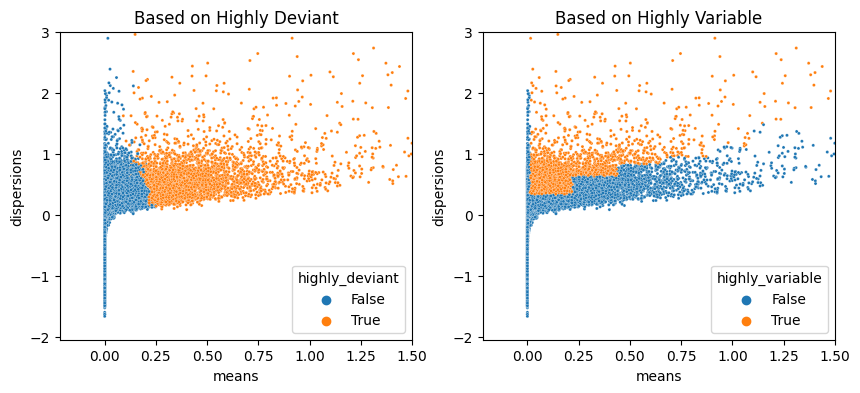

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_deviant", s=5,
    ax=axs[0]
)
axs[0].set_title("Based on Highly Deviant")
sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_variable", s=5,
    ax=axs[1]
)
axs[1].set_title("Based on Highly Variable")
for ax in axs:
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)

plt.show()

fig.savefig("../figures/dblt_figs/dispers_vs_means.png", transparent=True)
fig.savefig("../figures/dblt_figs/dispers_vs_means.svg", transparent=True)

# Dimensionalty Reduction

## PCA

## Preprocessing steps before running PCA

In [22]:
# Choose parameter for highly_variable
highly_var = "highly_variable"
highly_var = "highly_deviant"

mdata["gex"].layers["raw"] = mdata["gex"].X.copy()
mdata["gex"].X = mdata["gex"].layers["log1p_norm"].copy()

mdata["gex"].var["highly_variable"] = mdata["gex"].var[highly_var]
adata_hv = mdata["gex"][: ,mdata["gex"].var[highly_var]].copy()

In [23]:
num_processors = psutil.cpu_count(logical=False)
sc.pp.regress_out(adata_hv, ["pct_counts_mt", "total_counts"], n_jobs=num_processors)

#scales the data in the AnnData object so that each gene has a mean of zero and a standard deviation of one. 
# This standardization is a common preprocessing step, and it ensures that each gene has equal weight..
sc.pp.scale(
    adata_hv, 
    max_value=10 # caps the maximum value after scaling. This helps limit the impact of extreme outliers.
)

### Perform PCA

In [24]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

In [25]:
def plot_pc_rank(adata, n_pcs=20):
    plt.figure(figsize=(10, 3))

    log_var_ratio = np.log(adata.uns["pca"]["variance_ratio"])

    sns.scatterplot(log_var_ratio, s=30, edgecolor="black")
    plt.vlines(x=[i for i in range(len(log_var_ratio))], 
               ymin=min(log_var_ratio), 
               ymax=log_var_ratio, 
               color="grey", 
               zorder=-1,
               alpha=0.5
              )
    plt.vlines(x=n_pcs, color="r", ymin=min(log_var_ratio), ymax=max(log_var_ratio), linestyle="--")
    plt.ylabel("Log Variance Ratio")
    plt.xlabel("PC Rank")

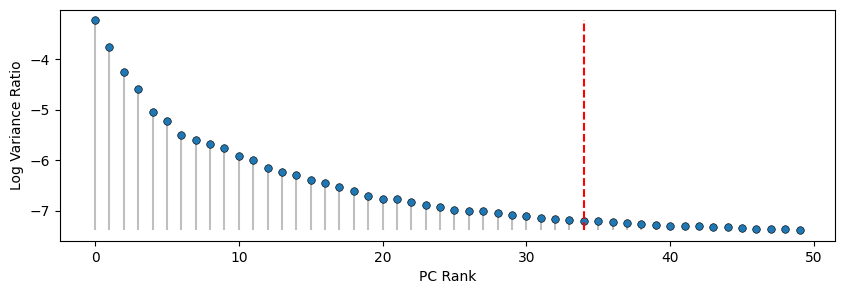

In [26]:
n_pcs=34 # Number of PCs for Donstream Clustering.
plot_pc_rank(adata_hv, n_pcs=n_pcs)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


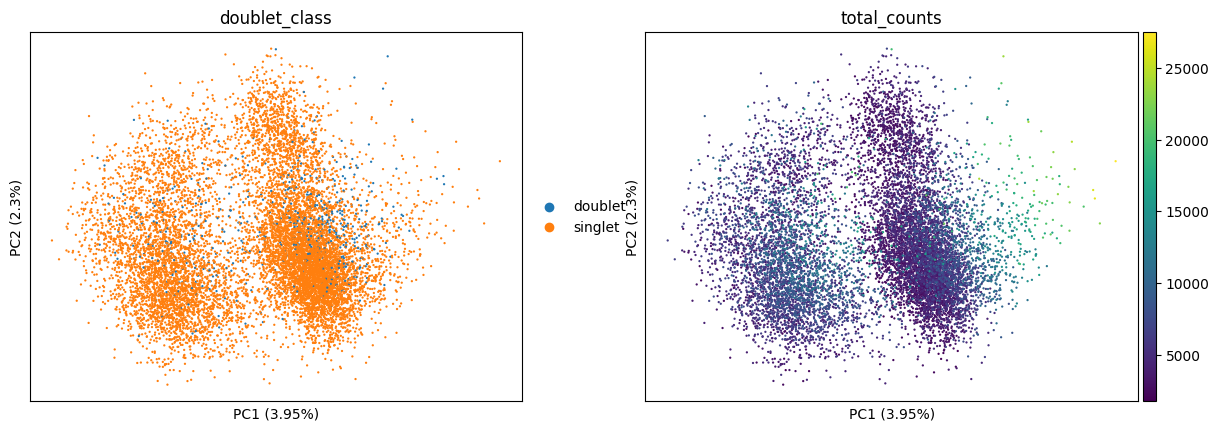

In [27]:
sc.pl.pca_scatter(adata_hv, color=["doublet_class", "total_counts"], annotate_var_explained=True)

## UMAP

In [28]:
np.random.seed(42)
n_neighbors = 10
sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n_neighbors)
sc.tl.umap(adata_hv)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Inspecting quality control metrics

In [29]:
#### Move up one resolution of  cells

In [30]:
adata_hv.obs["exp_cell_l1"] = ["_".join(cell) if "Natural" in cell else cell[0] for cell in adata_hv.obs.Cell_Type_Experimental.str.split("_") ]

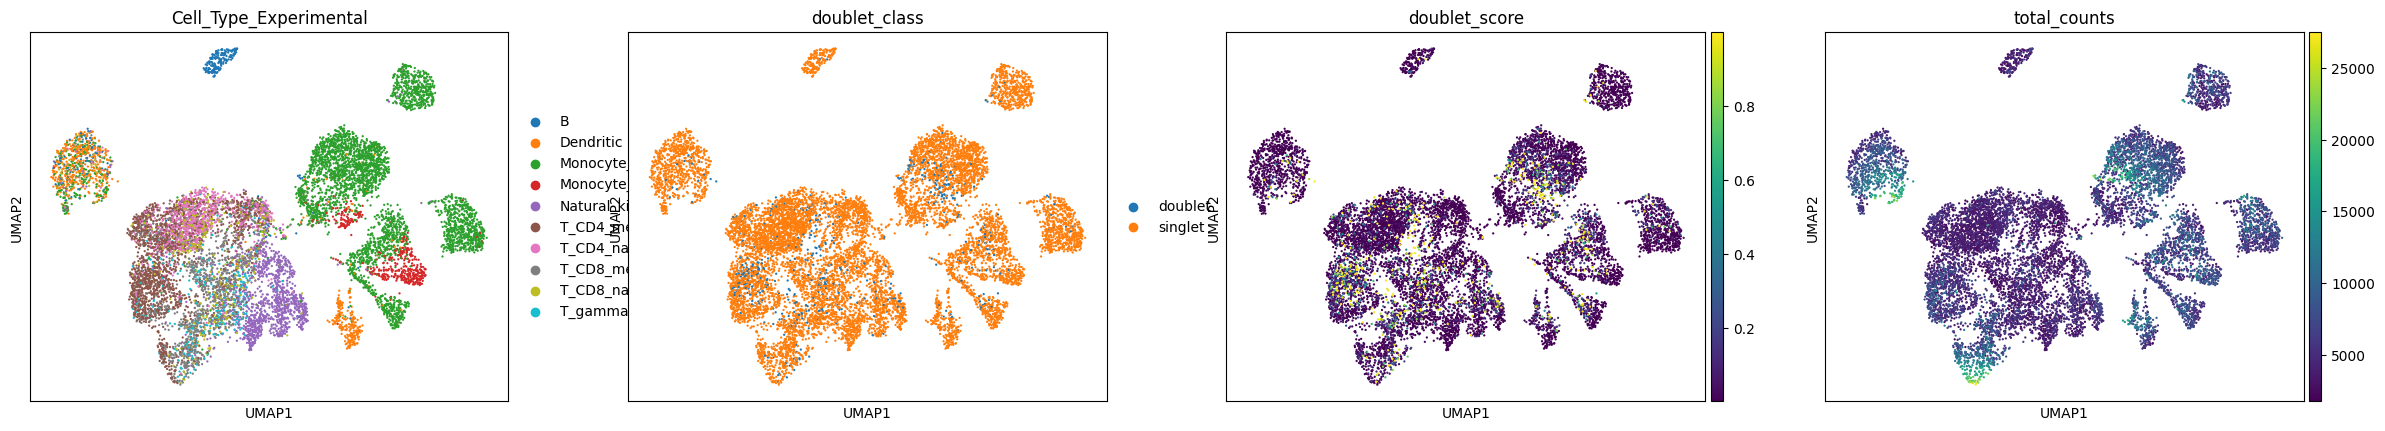

In [31]:
colors = ["Cell_Type_Experimental", "doublet_class", "doublet_score", "total_counts"]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    axes = sc.pl.umap(adata_hv,
                     color=colors,
                     show=False
              )

    umap_dir = os.path.join(dblt_figs, "umaps")

    if not os.path.isdir(umap_dir):
        os.mkdir(umap_dir)

    # for color, ax in zip(colors, axes):
    plt.savefig(os.path.join(umap_dir, f"umap_qc_{'_'.join(colors)}"))

In [32]:
sc.tl.leiden(adata_hv, resolution=0.25)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


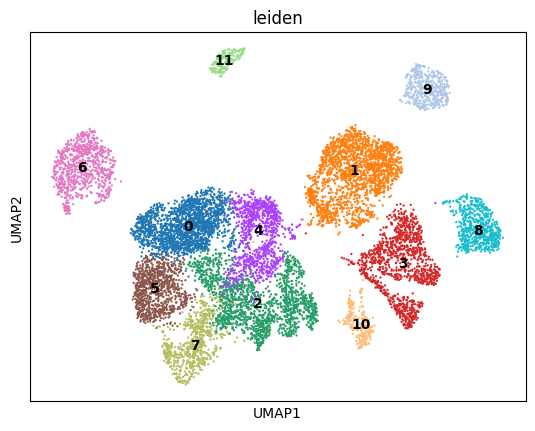

In [33]:
sc.pl.umap(
    adata_hv,
    color="leiden",
    legend_loc="on data",
)

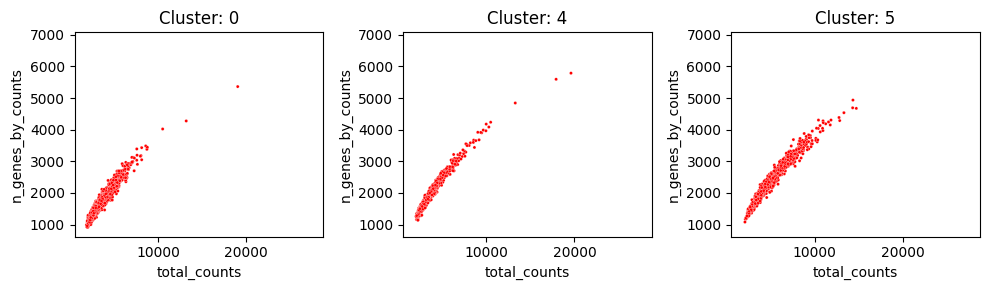

In [34]:
clusters = ["0", "4", "5"]
fig, axs = plt.subplots(ncols=3, figsize=(10, 3))

for ax, cluster in zip(axs, clusters):
    colors = adata_hv.obs["leiden"].apply(lambda x: "red" if x == cluster else "grey")
    alpha = adata_hv.obs["leiden"].apply(lambda x: 1 if x == cluster else 0.00)
    
    sns.scatterplot(adata_hv.obs,
                    x="total_counts",
                    y="n_genes_by_counts",
                    s=5,
                    color=colors,
                    alpha=alpha,
                    ax=ax
                   )

    ax.set_title("Cluster: " + cluster)
    
fig.tight_layout()

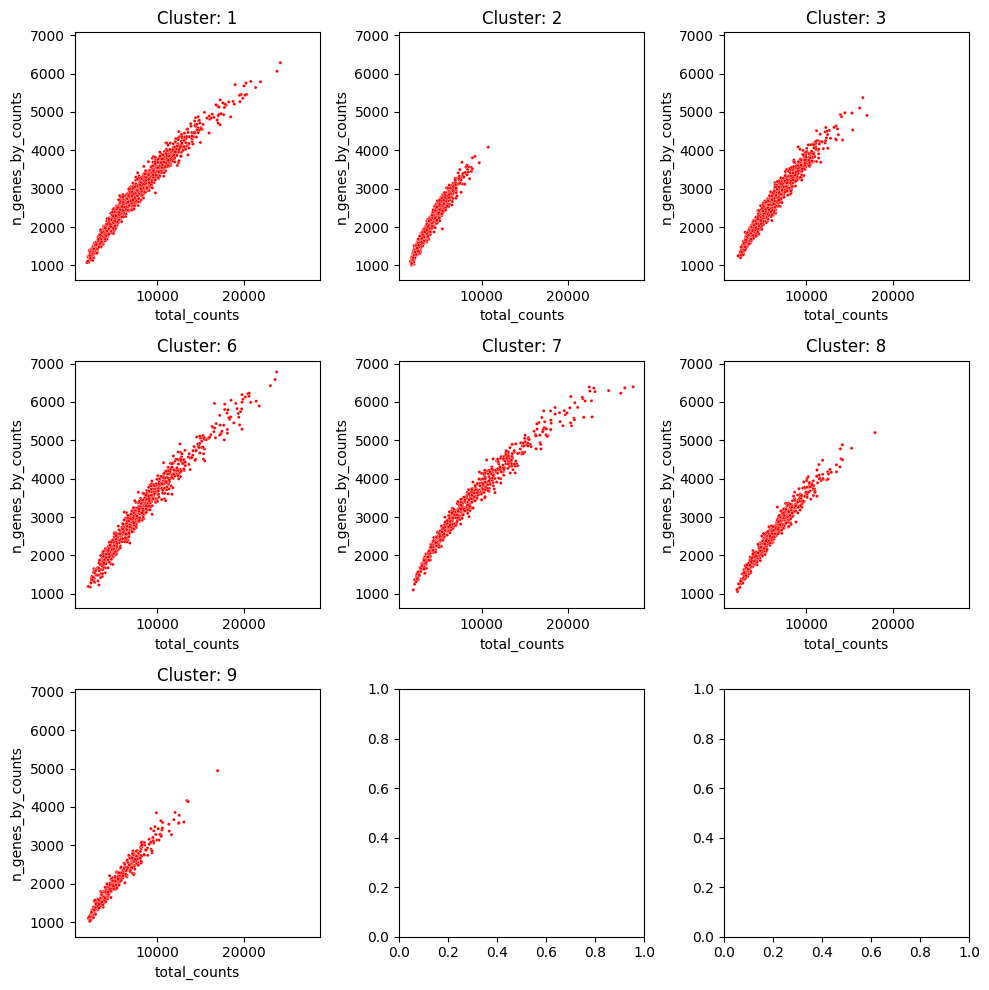

In [35]:
clusters = ["1", "2", "3", "6", "7", "8", "9"]
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))

for ax, cluster in zip(axs.flatten(), clusters):
    colors = adata_hv.obs["leiden"].apply(lambda x: "red" if x == cluster else "grey")
    alpha = adata_hv.obs["leiden"].apply(lambda x: 1 if x == cluster else 0.00)
    
    sns.scatterplot(adata_hv.obs,
                    x="total_counts",
                    y="n_genes_by_counts",
                    s=5,
                    color=colors,
                    alpha=alpha,
                    ax=ax
                   )

    ax.set_title("Cluster: " + cluster)
    
fig.tight_layout()

## Remove Doublets

In [36]:
doublets = (adata_hv.obs["doublet_class"] == "doublet") & (adata_hv.obs["doublet_score"] >= 0.8)
adata_hv = adata_hv[~doublets, ].copy()

### Recluster

In [37]:
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


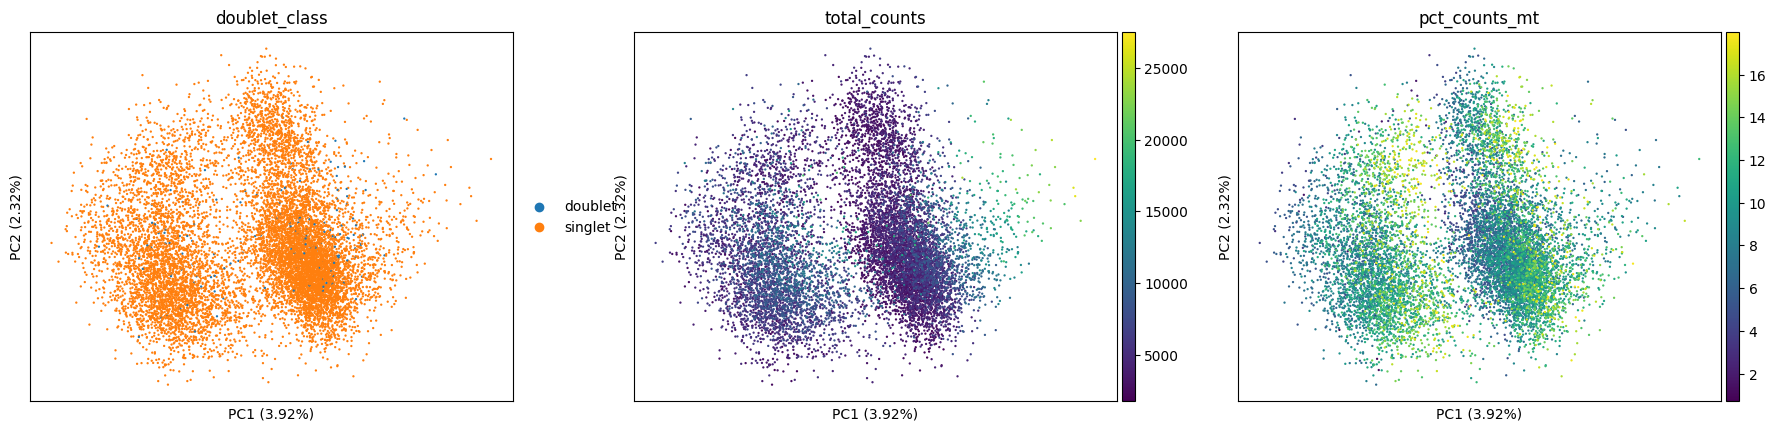

In [38]:
sc.pl.pca_scatter(adata_hv, color=["doublet_class", "total_counts", "pct_counts_mt"], annotate_var_explained=True)

# Save Doublet Outputs

In [54]:
file_path = "../data/qc_data/121c_dblt_clean.h5mu"

# Move clean adata object back to the mudata object
mdata.mod["gex"] = adata_hv.copy()
mu.pp.intersect_obs(mdata)
mdata

adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,Monocyte_classica..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,SampleTag04_hs,Sampl..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,SampleTag04_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,10,11,11,30,5,0,55,5430,16,0,8,11,70,21,5,2..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,38,36,1,3,15,7,121,61,419,9,16,21,12,2,0,97..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,55,17,10,3,7,750,27244,27,94,0,7,39,11,3,0..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,24086,12456,8,7,18,5,383,14,79,0,34,111,38,2..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,46,1,173,2,2,2,42,9,23,0,12,103,25,4,0,25,26..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,38,37,3,21,2,28,242,24,24696,10,16,67,51,15,..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,46,66,6260,6,6,11,370,32,58,327,27,113,490,6..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,130,38,5,9,10,6,89,23,40,5,4272,93,25,6,7,..."


In [55]:
mu.write_h5mu(mdata=mdata, filename=file_path)

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
